#### 📌 **Contextualização do Problema**


A retenção de clientes é um grande desafio para empresas de serviços, especialmente em setores competitivos como telecomunicações e bancos.

Nosso objetivo é desenvolver um modelo de Machine Learning para prever quais clientes têm maior probabilidade de cancelar o serviço (churn). Isso permitirá que a empresa tome ações preventivas para aumentar a retenção de clientes.


### 🏁 **1. Importação de Bibliotecas**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder , RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

### 📂 **2. Carregamento e Exploração dos Dados**

In [2]:
# Carregar dataset fictício de clientes (substitua por um dataset real se necessário)
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

# Visualizar as primeiras linhas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 📊 Descrição do Conjunto de Dados: Predição de Churn

O conjunto de dados utilizado para este projeto contém informações sobre clientes de uma empresa de telecomunicações. O objetivo é prever se um cliente cancelará (churn) ou não o serviço com base em suas características e comportamento.

### 📌 **Variáveis do Dataset**
O conjunto de dados contém as seguintes colunas:

- **gender** (`str`): Gênero do cliente (`Male`, `Female`).
- **SeniorCitizen** (`int`): Indica se o cliente é idoso (`1`) ou não (`0`).
- **Partner** (`str`): Indica se o cliente tem um parceiro (`Yes`, `No`).
- **Dependents** (`str`): Indica se o cliente tem dependentes (`Yes`, `No`).
- **tenure** (`int`): Número de meses que o cliente permaneceu na empresa.
- **PhoneService** (`str`): Indica se o cliente possui serviço telefônico (`Yes`, `No`).
- **MultipleLines** (`str`): Indica se o cliente tem múltiplas linhas telefônicas (`Yes`, `No`, `No phone service`).
- **InternetService** (`str`): Tipo de serviço de internet assinado (`DSL`, `Fiber optic`, `No`).
- **OnlineSecurity** (`str`): Indica se o cliente possui segurança online (`Yes`, `No`, `No internet service`).
- **OnlineBackup** (`str`): Indica se o cliente possui backup online (`Yes`, `No`, `No internet service`).
- **DeviceProtection** (`str`): Indica se o cliente possui proteção para dispositivos (`Yes`, `No`, `No internet service`).
- **TechSupport** (`str`): Indica se o cliente tem suporte técnico (`Yes`, `No`, `No internet service`).
- **StreamingTV** (`str`): Indica se o cliente tem serviço de TV por streaming (`Yes`, `No`, `No internet service`).
- **StreamingMovies** (`str`): Indica se o cliente tem serviço de filmes por streaming (`Yes`, `No`, `No internet service`).
- **Contract** (`str`): Tipo de contrato do cliente (`Month-to-month`, `One year`, `Two year`).
- **PaperlessBilling** (`str`): Indica se o cliente possui fatura digital (`Yes`, `No`).
- **PaymentMethod** (`str`): Método de pagamento utilizado (`Electronic check`, `Mailed check`, `Bank transfer`, `Credit card`).
- **MonthlyCharges** (`float`): Valor cobrado mensalmente do cliente.
- **TotalCharges** (`float`): Valor total gasto pelo cliente ao longo do tempo.

### 🎯 **Objetivo do Modelo**
O modelo de Machine Learning será treinado para prever a variável alvo **`Churn`**, que indica se o cliente cancelou (`Yes`) ou não (`No`) o serviço.



### 📊 **3. Análise Exploratória (EDA)**

In [3]:
# Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Estatísticas descritivas
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


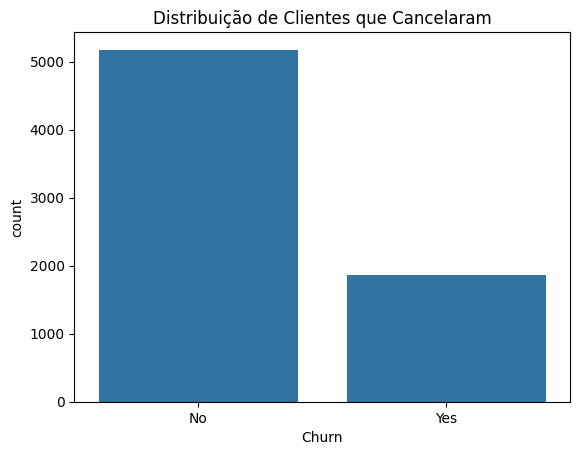

In [5]:
# Distribuição do alvo (churn ou não)
sns.countplot(x=df['Churn'])
plt.title("Distribuição de Clientes que Cancelaram")
plt.show()

### 🔧 **4. Pré-processamento dos Dados**

In [6]:
# Remover colunas irrelevantes
df = df.drop(columns=['customerID'])

In [7]:
'''
Percorre todas as colunas do DataFrame df que possuem dados categóricos (dtype=object).
select_dtypes(include=['object']) filtra apenas as colunas que contêm strings ou categorias.
O LabelEncoder converte valores categóricos em números inteiros (por exemplo, Yes → 1, No → 0).

Treina o LabelEncoder (fit): Aprende os valores únicos da coluna e atribui números inteiros.
Transforma os dados (transform): Substitui os valores originais pelos números correspondentes.

O resultado sobrescreve a coluna original convertendo-a para valores numéricos.
'''
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [8]:
# Separação entre variáveis independentes (X) e alvo (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

In [9]:
# Tratar outliers usando RobustScaler
scaler = RobustScaler()
scaler.fit_transform(X)

array([[-1.        ,  0.        ,  1.        , ...,  0.        ,
        -0.74517019, -0.22596811],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.24655014, -0.54153379],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.30358786, -0.93910402],
       ...,
       [-1.        ,  0.        ,  1.        , ...,  0.        ,
        -0.74977001, -0.07744875],
       [ 0.        ,  1.        ,  1.        , ...,  1.        ,
         0.07451702, -0.17889142],
       [ 0.        ,  0.        ,  0.        , ..., -2.        ,
         0.64949402,  0.65542901]])

Vantagens :

- Robusto a Outliers: Não é afetado por valores extremos como StandardScaler, pois usa mediana e quartis ao invés de média e desvio padrão.

- Funciona bem para distribuições não normais: Se os dados não seguem uma distribuição normal, o RobustScaler ainda funciona bem, ao contrário do StandardScaler.

- Evita distorções causadas por outliers: Como o MinMaxScaler normaliza os dados considerando valores máximos e mínimos, ele pode ser afetado por outliers, enquanto o RobustScaler os ignora.

In [10]:
# Aplicar balanceamento de classes via ajuste de pesos
class_weights = {0: len(y) / (2 * np.bincount(y)[0]), 1: len(y) / (2 * np.bincount(y)[1])}

- Balanceia o impacto das classes: Se o conjunto de dados for desbalanceado (por exemplo, 90% de uma classe e 10% de outra), o modelo tende a ignorar a classe minoritária. O ajuste de pesos corrige isso.

- Evita overfitting na classe majoritária: Sem balanceamento, o modelo pode aprender a prever sempre a classe mais frequente e ter um desempenho ruim na classe menor.

- Útil para modelos que suportam class_weight:

Esse dicionário pode ser passado diretamente para modelos como:
 - RandomForestClassifier(class_weight=class_weights)
 - LogisticRegression(class_weight=class_weights)
 - DecisionTreeClassifier(class_weight=class_weights)

### 🤖 **5. Treinamento do Modelo de Machine Learning**

In [11]:
# Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

```stratify=y```

Mantém a proporção original das classes na divisão entre treino e teste.
Se os dados forem desbalanceados (por exemplo, 90% da classe 0 e 10% da classe 1), essa opção garante que a mesma proporção será mantida no conjunto de treino e no conjunto de teste.
Sem stratify=y, o train_test_split() pode dividir os dados aleatoriamente, resultando em uma distribuição diferente da original.

In [12]:
# Treinamento do modelo RandomForest
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

- Define que 50 árvores de decisão serão criadas no modelo. Um número maior pode melhorar a precisão, mas aumenta o tempo de computação.

### 📉 **6. Avaliação do Modelo**

In [13]:
# Previsões
y_pred = model.predict(X_test)

In [14]:
# Acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 0.78


In [15]:
# Relatório de Classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1552
           1       0.62      0.47      0.53       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



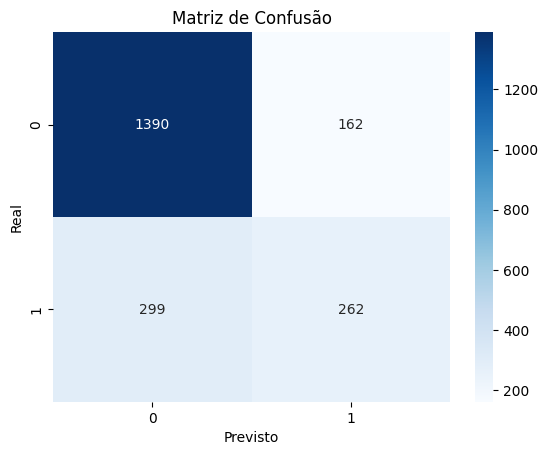

In [16]:
# Matriz de Confusão
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

### 🚀 **7. Possibilidade de melhoria dos resultados**

- Ajuste de Hiperparâmetros

    Utilize GridSearchCV ou RandomizedSearchCV para encontrar os melhores hiperparâmetros para o RandomForestClassifier.
    
    
- Feature Engineering

    Criar novas variáveis a partir dos dados existentes pode aumentar a capacidade do modelo de detectar padrões. Por exemplo, calcular     a média de uso mensal ou a variação do tempo de contrato.
    

- Seleção de Variáveis

    Algumas features podem estar adicionando ruído ao modelo. Você pode usar Recursive Feature Elimination (RFE) ou feature importance       do RandomForest para selecionar apenas as mais relevantes.
    

- Testar Diferentes Modelos

    O RandomForestClassifier é um bom modelo, mas você pode experimentar outros como XGBoost, LightGBM ou CatBoost, que costumam ter um     melhor desempenho.  

     

---

#### Implementação para otimizar hiperparâmetros:

Vamos adicionar essa variação no pré-processamento para encontrar melhores configurações:

In [18]:
# Definir os hiperparâmetros para buscar os melhores valores
param_grid = {
    'n_estimators': [300,500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=2, n_jobs=2, verbose=2)
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_
print("Melhores Hiperparâmetros:", grid_search.best_params_)


Fitting 2 folds for each of 96 candidates, totalling 192 fits
Melhores Hiperparâmetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


Hiperparâmetros Explicados


- ```n_estimators``` : Número de árvores na floresta (300 ou 500). Mais árvores podem melhorar a performance, mas aumentam o tempo de computação.

- ```max_depth``` : Profundidade máxima das árvores (None significa que a árvore cresce até o fim). Menores valores evitam overfitting.

- ```min_samples_split``` : Número mínimo de amostras necessárias para dividir um nó (2, 5, 10). Valores maiores evitam árvores muito complexas.

- ```min_samples_leaf``` :	Número mínimo de amostras em uma folha (1, 2, 4, 6). Se muito baixo, pode causar overfitting.


``GridSearchCV`` faz a busca testando todas as combinações dos hiperparâmetros no param_grid.

``cv=5`` → Usa validação cruzada de 5 folds para avaliar cada combinação.

``n_jobs=-1`` → Usa todos os processadores disponíveis para acelerar o treinamento.

``verbose=2`` → Exibe logs detalhados do progresso da busca.


**OBS:** GridSearchCV pode ser demorado, pois ele testa todas as combinações de hiperparâmetros fornecidos. Algumas formas de reduzir o tempo de execução incluem:

- Usar RandomizedSearchCV em vez de GridSearchCV:

Em vez de testar todas as combinações, ele escolhe aleatoriamente algumas, reduzindo o tempo de execução.

In [20]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid,
                                   n_iter=10, cv=2, n_jobs=2, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
print("Melhores Hiperparâmetros:", random_search.best_params_)
#Reduzir o espaço de busca dos hiperparâmetros

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Melhores Hiperparâmetros: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_depth': 20}


- Diminuir a quantidade de valores testados, como n_estimators=[100, 150] e max_depth=[None, 10, 20], pode acelerar o processo.

- Diminuir a quantidade de folds do cv=5 para cv=3: Reduz o número de divisões dos dados para validação cruzada, acelerando a busca.

- Reduzir o tamanho do dataset temporariamente: você pode usar apenas uma amostra dos dados para testar diferentes hiperparâmetros antes de treinar no conjunto completo.

In [21]:
# Inclusão dos parâmetros a partir do Grid_Search
rf_model_param = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_model_param.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=300,
                       random_state=42)

In [22]:
# Previsões Random Forest
y_pred_rf = rf_model_param.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do Random Forest: {accuracy_rf:.2f}")

Acurácia do Random Forest: 0.80


In [23]:
# Relatório de Classificação antes do grid search
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1552
           1       0.62      0.47      0.53       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [24]:
# Relatório de Classificação após grid search
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.66      0.49      0.56       561

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



---

###  **8. Salvar o modelo Treinado para utilização**

In [25]:
# Salvar modelos treinados e label_encoders
joblib.dump(rf_model_param, 'churn_rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']